# Implementação de algoritmo para usar as classes de simulação de array de microfones e GSC para o SESA Dataset

A ideia desse jupyter é criar um algoritmo que, dadas a pasta de origem e as de destino, simule um array de microfones com os áudios da pasta de origem e salve os sinais sem beamforming, com beamforming e com GSC nas pastas de destino.

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy

#### Importando as classes criadas

In [3]:
import sys
sys.path.append('/home/dimi/Programming/IC2019/DOA/Python')

from GeneralizedSidelobeCancellerClass import GeneralizedSidelobeCanceller
from SimularArrayMicrofonesClass import SimularArrayMicrofones

## Definindo uma boa amplitude para o ruído

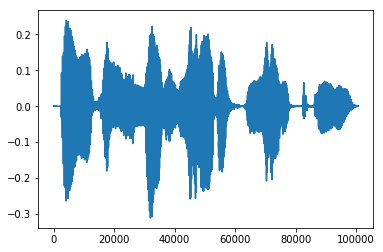

In [2]:
caminho = '/home/dimi/Programming/IC2019/DOA/Gravacoes/Simulacoes/Gravacao3/sinalPuroMono2Segundos.wav'
sinalOriginal, freqAmostragem = librosa.load(caminho, sr=None, mono=True)

plt.plot(sinalOriginal)

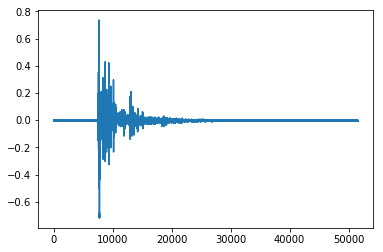

In [6]:
caminho = "/home/dimi/Downloads/SESA_SOX/test/casual_112.wav"
sinalOriginal, freqAmostragem = librosa.load(caminho, sr=None, mono=True)

plt.plot(sinalOriginal)

## Rodando o algoritmo

#### Definindo os parâmetros iniciais desse algoritmo

In [5]:
pastaOrigem                = '/home/dimi/Downloads/SESA/test/'
pastaDestinoSemBeamforming = '/home/dimi/Downloads/SESA/outros/ruidoA/testeSemBeamforming/'
pastaDestinoBeamforming    = '/home/dimi/Downloads/SESA/outros/ruidoA/testeBeamforming/'
pastaDestinoGSC            = '/home/dimi/Downloads/SESA/outros/ruidoA/testeGSC/'

#### Definindo os parâmetros iniciais da classe de simulação de array de microfones

In [6]:
qtdMics        = 4
amplitudeRuido = 0.000001

#### Rodando o algoritmo

In [7]:
# LISTANDO OS ARQUIVOS NO DIRETORIO DE ORIGEM
arrayArquivos = os.listdir(pastaOrigem)
totalArquivos = len(arrayArquivos)

# CRIANDO UM ARRAY PRA ARMAZENAR OS TEMPOS DE PROCESSAMENTO
arrayTempoProcessamentoGSC = []

# PARA CADA ARQUIVO NA PASTA DE ORIGEM
for i, arquivoAtual in enumerate(arrayArquivos):
    
        print("\n" + arquivoAtual + ": arquivo " + str(i+1) + " de " + str(totalArquivos) + " -> " + str(100*((i+1)/totalArquivos)) + "%")
        
        # EU SIMULO UM ARRAY DE MICROFONES
        caminhoArquivo = pastaOrigem + arquivoAtual
        objSimularArrayMics = SimularArrayMicrofones(caminhoArquivo, qtdMics, amplitudeRuido)
        arraySinaisSimulados, arrayDelays, freqAmostragem = objSimularArrayMics.obterResultado()
        
        # APLICO O BEAMFORMING E GSC
        objGSC = GeneralizedSidelobeCanceller(arraySinaisSimulados, arrayDelays)
        sinalSemBeamforming, sinalBeamformado, sinalFinalGSC = objGSC.obterSinaisResultantes()
        arrayTempoProcessamentoGSC.append(objGSC.tempoProcessamentoGSC)
        
        # E POR FIM SALVO NAS PASTAS DE DESTINO
        librosa.output.write_wav(pastaDestinoSemBeamforming + arquivoAtual, sinalSemBeamforming, freqAmostragem)
        librosa.output.write_wav(pastaDestinoBeamforming + arquivoAtual, sinalBeamformado, freqAmostragem)
        librosa.output.write_wav(pastaDestinoGSC + arquivoAtual, sinalFinalGSC, freqAmostragem)


explosion_182.wav: arquivo 1 de 105 -> 0.9523809523809524%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 1.2946391105651855

gunshot_027.wav: arquivo 2 de 105 -> 1.9047619047619049%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 1.9259271621704102

explosion_031.wav: arquivo 3 de 105 -> 2.857142857142857%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 0.8836731910705566

gunshot_032.wav: arquivo 4 de 105 -> 3.8095238095238098%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 1.1312716007232666

gunshot_084.wav: arquivo 5 de 105 -> 4.761904761904762%
Iniciando a filtragem adaptativa com LMS


KeyboardInterrupt: 

#### Verificando como foi o tempo de processamento

In [ ]:
print("Tempo médio (seg):\t", np.mean(arrayTempoProcessamentoGSC))
print("Tempo mínimo (seg):\t", np.amin(arrayTempoProcessamentoGSC))
print("Tempo máximo (seg):\t", np.amax(arrayTempoProcessamentoGSC))
print("Desvio padrão (seg):\t", np.std(arrayTempoProcessamentoGSC))
print("Tempo total (min):\t", np.sum(arrayTempoProcessamentoGSC)/60)